## Lexical Resources

A lexicon, or lexical resource, is a collection of words and/or phrases along with associated information such as part of speech and sense definitions. Lexical resources are secondary to texts, and are usually created and enriched with the help of texts. For example, if we have defined a text `my_text`, then `vocab = sorted(set(my_text))` builds the vocabulary of `my_text`, while `word_freq = FreqDist(my_text)` counts the frequency of each word in the text. Both of `vocab` and` word_freq` are simple lexical resources. Similarly, a concordance like the one we saw in 1 gives us information about word usage that might help in the preparation of a dictionary. A lexical entry consists of a headword (also known as a lemma) along with additional information such as the part of speech and the sense definition. Two distinct words having the same spelling are called homonyms.

### Wordlist Corpora

The Words Corpus is the /usr/share/dict/words file from Unix, used by some spell checkers. We can use it to find unusual or mis-spelt words in a text corpus

In [2]:
import nltk

In [1]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [5]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:11]

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations',
 'accompanied']

There is also a corpus of stopwords, that is, high-frequency words like the, to and also that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.

In [7]:
from nltk.corpus import stopwords
stopwords.words('english')[:11]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've"]

A wordlist is useful for solving word puzzles. Our program iterates through every word and, for each one, checks whether it meets the conditions. It is easy to check obligatory letter and length constraints (and we'll only look for words with six or more letters here). It is trickier to check that candidate solutions only use combinations of the supplied letters, especially since some of the supplied letters appear twice (here, the letter v). The FreqDist comparison method permits us to check that the frequency of each letter in the candidate word is less than or equal to the frequency of the corresponding letter in the puzzle.

In [11]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()

In [12]:
[w for w in wordlist if len(w) >=6 and obligatory in w and nltk.FreqDist(w) <= puzzle_letters]

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

*Names Corpus*

containing 8,000 first names categorized by gender. The male and female names are stored in separate files.

In [13]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [15]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')

In [17]:
[w for w in male_names if w in female_names][:11]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali']

**Visualize that names ending in a are almost always female**

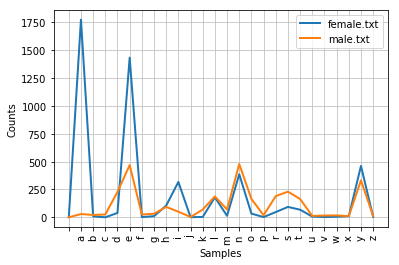

In [19]:
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

### Pronouncing dictionary
A slightly richer kind of lexical resource is a table (or spreadsheet), containing a word plus some properties in each row. NLTK includes the CMU Pronouncing Dictionary for US English, which was designed for use by speech synthesizers.

 primary stress (1), secondary stress (2) and no stress (0)



In [20]:
entries = nltk.corpus.cmudict.entries()
len(entries)

133737

In [25]:
entries[2434]

('alcatraz', ['AE2', 'L', 'K', 'AH0', 'T', 'R', 'AE1', 'Z'])

This program finds all words whose pronunciation ends with a syllable sounding like 'nicks'. You could use this method to find rhyming words.

In [26]:
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable][:11]

["atlantic's",
 'audiotronics',
 'avionics',
 'beatniks',
 'calisthenics',
 'centronics',
 'chamonix',
 'chetniks',
 "clinic's",
 'clinics',
 'conics']

In [27]:
[w for w, pron in entries if pron[-1] == 'M' and w[-1] == 'n']

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']

In [29]:
# We can use any lexical resource to process a text, e.g., to filter out words having some lexical property (like nouns), or mapping every word of the text. For example, the following text-to-speech function looks up each word of the text in the pronunciation dictionary.
prondict = nltk.corpus.cmudict.dict()
text = ['natural', 'language', 'processing']
[ph for w in text for ph in prondict[w][0]]

['N',
 'AE1',
 'CH',
 'ER0',
 'AH0',
 'L',
 'L',
 'AE1',
 'NG',
 'G',
 'W',
 'AH0',
 'JH',
 'P',
 'R',
 'AA1',
 'S',
 'EH0',
 'S',
 'IH0',
 'NG']

### Comparative Wordlists

NLTK includes so-called Swadesh wordlists, lists of about 200 common words in several languages. The languages are identified using an ISO 639 two-letter code.

In [31]:
from nltk.corpus import swadesh
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [32]:
swadesh.words('en')

['I',
 'you (singular), thou',
 'he',
 'we',
 'you (plural)',
 'they',
 'this',
 'that',
 'here',
 'there',
 'who',
 'what',
 'where',
 'when',
 'how',
 'not',
 'all',
 'many',
 'some',
 'few',
 'other',
 'one',
 'two',
 'three',
 'four',
 'five',
 'big',
 'long',
 'wide',
 'thick',
 'heavy',
 'small',
 'short',
 'narrow',
 'thin',
 'woman',
 'man (adult male)',
 'man (human being)',
 'child',
 'wife',
 'husband',
 'mother',
 'father',
 'animal',
 'fish',
 'bird',
 'dog',
 'louse',
 'snake',
 'worm',
 'tree',
 'forest',
 'stick',
 'fruit',
 'seed',
 'leaf',
 'root',
 'bark (from tree)',
 'flower',
 'grass',
 'rope',
 'skin',
 'meat',
 'blood',
 'bone',
 'fat (noun)',
 'egg',
 'horn',
 'tail',
 'feather',
 'hair',
 'head',
 'ear',
 'eye',
 'nose',
 'mouth',
 'tooth',
 'tongue',
 'fingernail',
 'foot',
 'leg',
 'knee',
 'hand',
 'wing',
 'belly',
 'guts',
 'neck',
 'back',
 'breast',
 'heart',
 'liver',
 'drink',
 'eat',
 'bite',
 'suck',
 'spit',
 'vomit',
 'blow',
 'breathe',
 'laugh',

In [33]:
fr2en = swadesh.entries(['fr', 'en'])
translate= dict(fr2en)

In [40]:
translate['avec']

'with'

Perhaps the single most popular tool used by linguists for managing data is Toolbox, previously known as Shoebox since it replaces the field linguist's traditional shoebox full of file cards. Toolbox is freely downloadable from http://www.sil.org/computing/toolbox/.

A Toolbox file consists of a collection of entries, where each entry is made up of one or more fields. Most fields are optional or repeatable, which means that this kind of lexical resource cannot be treated as a table or spreadsheet.

Here is a dictionary for the Rotokas language. We see just the first entry, for the word kaa meaning "to gag":



In [41]:
from nltk.corpus import toolbox

In [43]:
toolbox.entries('rotokas.dic')[0]

('kaa',
 [('ps', 'V'),
  ('pt', 'A'),
  ('ge', 'gag'),
  ('tkp', 'nek i pas'),
  ('dcsv', 'true'),
  ('vx', '1'),
  ('sc', '???'),
  ('dt', '29/Oct/2005'),
  ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
  ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
  ('xe', 'Apoka is gagging from food while talking.')])

### WordNet

In [44]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

Thus, motorcar has just one possible meaning and it is identified as car.n.01, the first noun sense of car. The entity car.n.01 is called a synset, or "synonym set", a collection of synonymous words (or "lemmas"):

In [45]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [46]:
 wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [47]:
 wn.synset('car.n.01').examples()

['he needs a car to get to work']

Although definitions help humans to understand the intended meaning of a synset, the words of the synset are often more useful for our programs. To eliminate ambiguity, we will identify these words as car.n.01.automobile, car.n.01.motorcar, and so on. This pairing of a synset with a word is called a lemma. We can get all the lemmas for a given synset , look up a particular lemma, get the synset corresponding to a lemma, and get the "name" of a lemma

In [48]:
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [49]:
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [51]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [54]:
wn.lemma('car.n.01.automobile').name()

'automobile'

In [52]:
# unlike motorcar, car is ambiguous having 5 subsets
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [53]:
for synset in wn.synsets('car'):
        print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [55]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

WordNet synsets correspond to abstract concepts, and they don't always have corresponding words in English. These concepts are linked together in a hierarchy. Some concepts are very general, such as Entity, State, Event — these are called unique beginners or root synsets. Others, such as gas guzzler and hatchback, are much more specific. 

WordNet makes it easy to navigate between concepts.

In [59]:
# hyponyms are more closely related to the origin word
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]

Synset('ambulance.n.01')

In [58]:
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())[:11]

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car']

In [62]:
# navigate up the hierarchy using hypernyms.  Some words have multiple paths, because they can be classified in more than one way. There are two paths between car.n.01 and entity.n.01 
# because wheeled_vehicle.n.01 can be classified as both a vehicle and a container.
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [63]:
paths = motorcar.hypernym_paths()
len(paths)

2

In [64]:
[synset.name() for synset in paths[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [65]:
[synset.name() for synset in paths[1]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [67]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

Hypernyms and hyponyms are called lexical relations because they relate one synset to another. These two relations navigate up and down the "is-a" hierarchy. Another important way to navigate the WordNet network is from items to their components (meronyms) or to the things they are contained in (holonyms). For example, the parts of a tree are its trunk, crown, and so on; the part_meronyms(). The substance a tree is made of includes heartwood and sapwood; the substance_meronyms(). A collection of trees forms a forest; the member_holonyms():

In [68]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [69]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [70]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [71]:
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ':', synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


We can see that mint.n.04 is part of mint.n.02 and the substance from which mint.n.05 is made.

In [73]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [74]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

There are also relationships between verbs. For example, the act of walking involves the act of stepping, so walking entails stepping. Some verbs have multiple entailments:



In [75]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [76]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [77]:
wn.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

**antonyms**

In [78]:
wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [79]:
wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [80]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('vertical.a.01.vertical'), Lemma('inclined.a.02.inclined')]

In [81]:
wn.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

### Semantic Similarity

We have seen that synsets are linked by a complex network of lexical relations. Given a particular synset, we can traverse the WordNet network to find synsets with related meanings. Knowing which words are semantically related is useful for indexing a collection of texts, so that a search for a general term like vehicle will match documents containing specific terms like limousine.

Recall that each synset has one or more hypernym paths that link it to a root hypernym such as entity.n.01. Two synsets linked to the same root may have several hypernyms in common. If two synsets share a very specific hypernym — one that is low down in the hypernym hierarchy — they must be closely related.

In [83]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')

In [84]:
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [85]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [86]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [87]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

Of course we know that whale is very specific (and baleen whale even more so), while vertebrate is more general and entity is completely general. We can quantify this concept of generality by looking up the depth of each synset:

In [89]:
wn.synset('baleen_whale.n.01').min_depth()

14

In [90]:
wn.synset('entity.n.01').min_depth()

0

Similarity measures have been defined over the collection of WordNet synsets which incorporate the above insight. For example, path_similarity assigns a score in the range 0–1 based on the shortest path that connects the concepts in the hypernym hierarchy (-1 is returned in those cases where a path cannot be found). Comparing a synset with itself will return 1. Consider the following similarity scores, relating right whale to minke whale, orca, tortoise, and novel. Although the numbers won't mean much, they decrease as we move away from the semantic space of sea creatures to inanimate objects.

In [91]:
right.path_similarity(minke)

0.25

In [92]:
right.path_similarity(novel)

0.043478260869565216

In [93]:
help(wn)

Help on WordNetCorpusReader in module nltk.corpus.reader.wordnet object:

class WordNetCorpusReader(nltk.corpus.reader.api.CorpusReader)
 |  A corpus reader used to access wordnet or its variants.
 |  
 |  Method resolution order:
 |      WordNetCorpusReader
 |      nltk.corpus.reader.api.CorpusReader
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, root, omw_reader)
 |      Construct a new wordnet corpus reader, with the given root
 |      directory.
 |  
 |  all_lemma_names(self, pos=None, lang='eng')
 |      Return all lemma names for all synsets for the given
 |      part of speech tag and language or languages. If pos is
 |      not specified, all synsets for all parts of speech will
 |      be used.
 |  
 |  all_synsets(self, pos=None)
 |      Iterate over all synsets with a given part of speech tag.
 |      If no pos is specified, all synsets for all parts of speech
 |      will be loaded.
 |  
 |  citation(self, lang='omw')
 |      Return the conte

- A text corpus is a large, structured collection of texts. NLTK comes with many corpora, e.g., the Brown Corpus, nltk.corpus.brown.
- Some text corpora are categorized, e.g., by genre or topic; sometimes the categories of a corpus overlap each other.
- A conditional frequency distribution is a collection of frequency distributions, each one for a different condition. They can be used for counting word frequencies, given a context or a genre.
- Python programs more than a few lines long should be entered using a text editor, saved to a file with a .py extension, and accessed using an import statement.
- Python functions permit you to associate a name with a particular block of code, and re-use that code as often as necessary.
- Some functions, known as "methods", are associated with an object and we give the object name followed by a period followed by the function, like this: x.funct(y), e.g., word.isalpha().
- To find out about some variable v, type help(v) in the Python interactive interpreter to read the help entry for this kind of object.
- WordNet is a semantically-oriented dictionary of English, consisting of synonym sets — or synsets — and organized into a network.
- Some functions are not available by default, but must be accessed using Python's import statement.